<a href="https://colab.research.google.com/github/nimithagopinath/Water-Quality-Classification-ML-with-K-means-Random-Forest/blob/main/water%20quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline


sns.set()

df = pd.read_csv('/content/drive/MyDrive/Assignment 4/Data/archive (1)/water_potability.csv')
df.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df.tail()
df.dtypes
df.shape


(3276, 10)

In [ ]:
# check the missing data:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# replace each missing data point with mean value of each column:
means_column = df.mean()
means_column

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [ ]:
df.fillna(means_column, inplace=True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


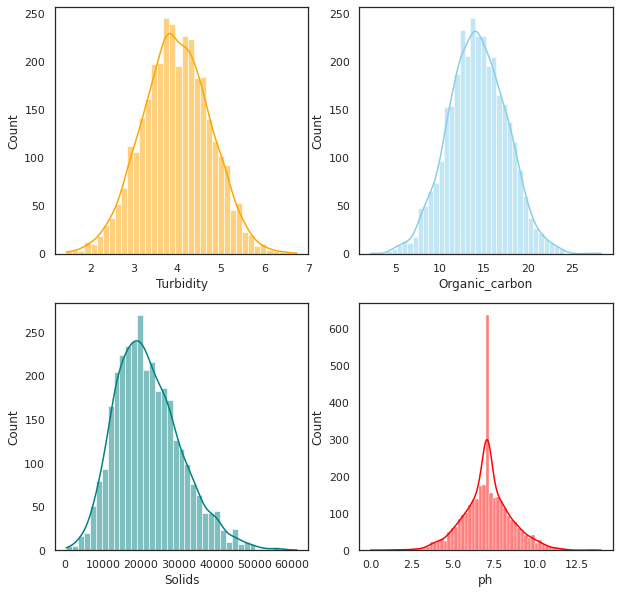

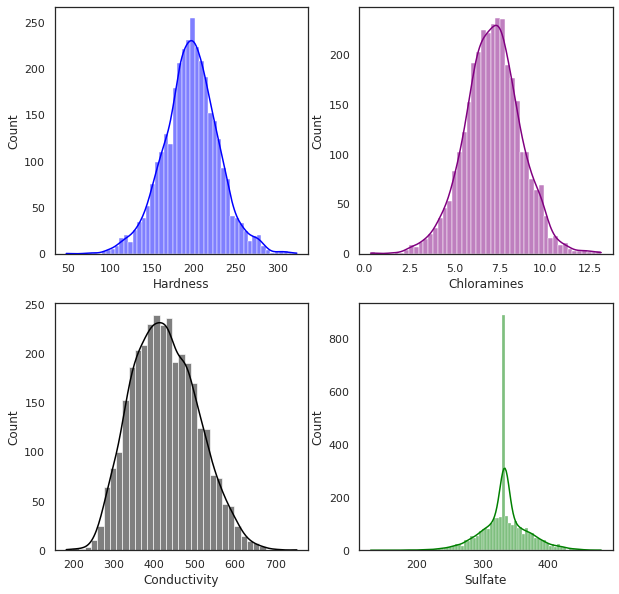

In [ ]:
sns.set(style='white')
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df, x='Turbidity', kde=True, color='Orange', ax=axs[0,0])
sns.histplot(data=df, x='Organic_carbon', kde=True, color='skyblue', ax=axs[0,1])
sns.histplot(data=df, x='Solids', kde=True, color='teal', ax=axs[1,0])
sns.histplot(data=df, x='ph', kde=True, color='red', ax=axs[1, 1])
plt.show()

sns.set(style='white')
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df, x='Hardness', kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=df, x='Chloramines', kde=True, color='purple', ax=axs[0,1])
sns.histplot(data=df, x='Conductivity', kde=True, color='black', ax=axs[1,0])
sns.histplot(data=df, x='Sulfate', kde=True, color='green', ax=axs[1, 1])
plt.show()

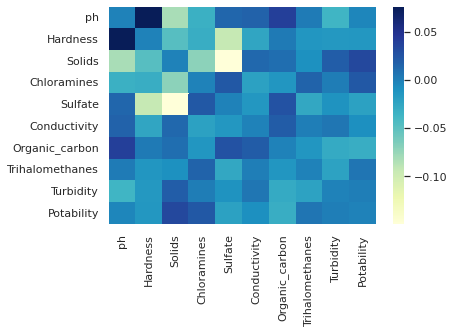

In [ ]:
# Examine the correaltion and skew:
corr_mat = df.corr()
# Strip the diagnoal for future examination:
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat
corr_mat.abs().idxmax()
# Examin the skew values and log transformation:
log_columns = df.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

sns.heatmap(corr_mat, cmap='YlGnBu', annot=False)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
for col in df.columns:
    df[col] = mms.fit_transform(df[[col]]).squeeze()

#sns.pairplot(df, kind='scatter', hue='Potability', palette="Set2")

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505771,0.540231,0.356173,0.529963,0.581699,0.427940,0.463026,0.532673,0.475853,0.390110
std,0.104997,0.119263,0.143968,0.123921,0.102669,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.505771,0.542401,0.338338,0.530591,0.581699,0.420386,0.460473,0.532673,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


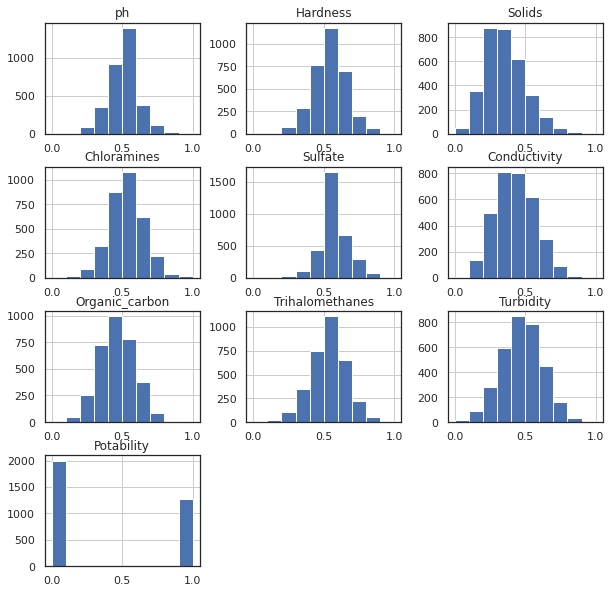

In [ ]:
##KMEANS


#X = pd.get_dummies(train_data[features])
y = df['Potability']
X = df.drop(columns='Potability')

p = df.hist(figsize = (10,10))

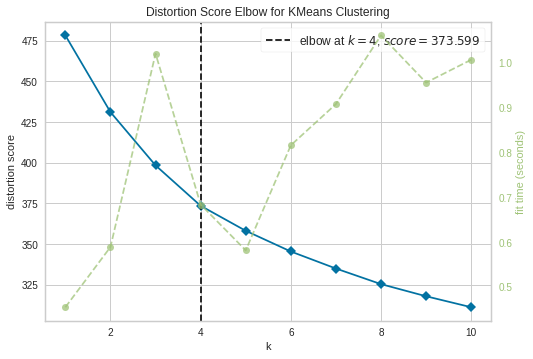

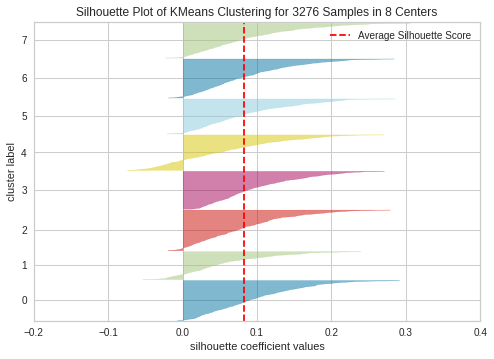

In [ ]:
#Elbow method and Silhouette

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state= 42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#Accuracy and silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(f' Accuracy_Score:\n {max(accuracy_score(y,y_kmeans_2clusters_labels.round()),1-accuracy_score(y,y_kmeans_2clusters_labels.round()))}')


from sklearn.metrics import silhouette_score
ss= silhouette_score(X,y_kmeans_2clusters_labels)
print("Sihouette score:\n ", ss)

 Accuracy_Score:
 0.51007326007326
Sihouette score:
  0.09678408076126438


In [ ]:
## PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

from sklearn.decomposition import PCA

# Create principal components
pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()



,PC1,PC2
0,-0.143055,0.126408
1,0.134003,-0.021300
2,-0.191079,0.056853
3,0.025505,-0.105923
4,-0.006569,-0.073016


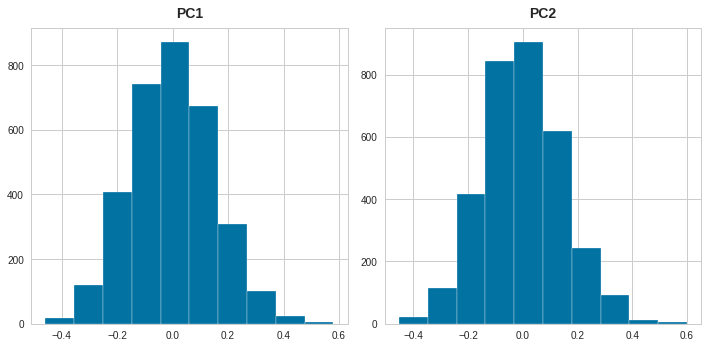

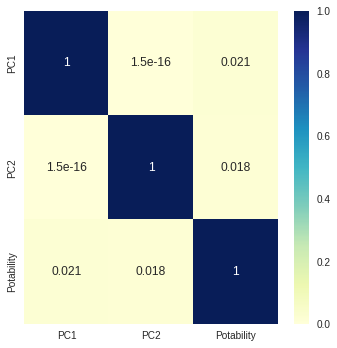

In [ ]:
p = X_pca.hist(figsize = (10,5))
data_pca = X_pca.copy()
data_pca['Potability'] = y.copy()
plt.figure(figsize = (5, 5))
sns.heatmap(data_pca.corr(), annot = True, cmap="YlGnBu")

CPU times: user 1.88 s, sys: 224 ms, total: 2.1 s
Wall time: 1.87 s


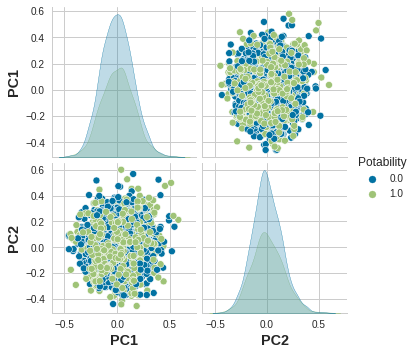

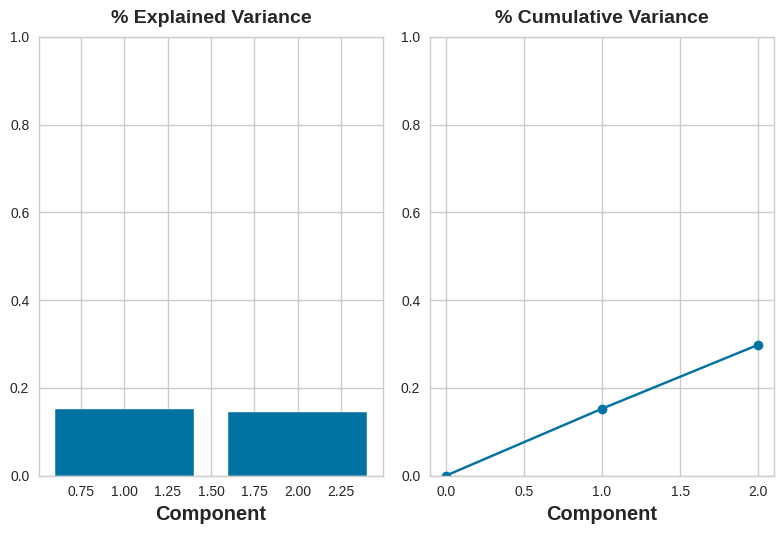

In [ ]:
%%time
p=sns.pairplot(data_pca, hue = 'Potability')

# Look at explained variance
plot_variance(pca);


mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

#X_pca_kmeans = X_pca[['PC1','PC3']]
X_pca_GMM = X_pca.copy()
X_pca_kmeans =X_pca.copy()



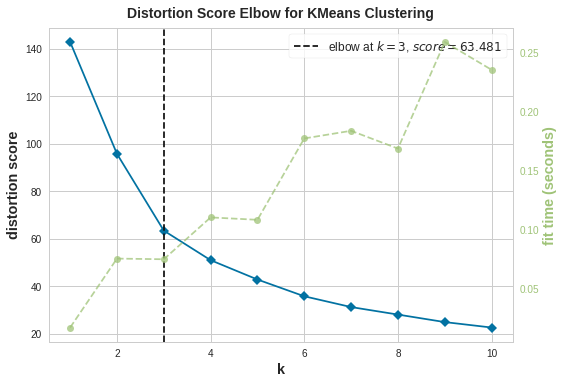

In [ ]:
## Kmeans with PCA

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_pca_kmeans)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

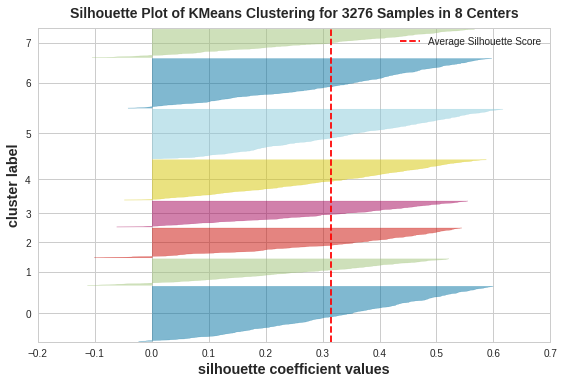

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state= 42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_pca_kmeans)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(f' Accuracy_Score:\n {max(accuracy_score(y,y_kmeans_pca_2clusters_labels.round()),1-accuracy_score(y,y_kmeans_pca_2clusters_labels.round()))}')

from sklearn.metrics import silhouette_score
ss= silhouette_score(X_pca_kmeans,y_kmeans_pca_2clusters_labels)
print("Sihouette score:\n ", ss)


 Accuracy_Score:
 0.5128205128205128
Sihouette score:
  0.3156573401456923


In [ ]:
## PART 2


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #piechart için px
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

print("x - train shape:",X_train.shape)
print("x - test shape:",X_test.shape)
print("y - train shape:",y_train.shape)
print("y - test shape:",y_test.shape)

# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

x - train shape: (2194, 9)
x - test shape: (1082, 9)
y - train shape: (2194,)
y - test shape: (1082,)


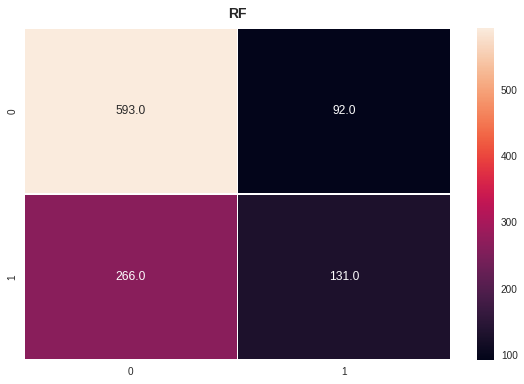

In [ ]:
models = [("RF",RandomForestClassifier())]
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

In [ ]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }

}
model_params



{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [ ]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 7, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 25, 1)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True
                           )
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [ ]:
from sklearn.metrics import roc_auc_score

def print_score(m):
    res = [roc_auc_score(m.predict(X_train), y_train), roc_auc_score(m.predict(X_test), y_test),
           m.score(X_train, y_train), m.score(X_test, y_test)
          ]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=False)
%time m.fit(X_train, y_train)

print_score(m)

CPU times: user 306 ms, sys: 10 ms, total: 316 ms
Wall time: 334 ms
[0.9770992366412214, 0.5405110148067895, 0.963302752293578, 0.5907087148185826]


In [ ]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,2,Chloramines,0.225315
1,4,Sulfate,0.185683
2,1,Hardness,0.141916
3,0,ph,0.097055
4,3,Solids,0.086163
5,7,Trihalomethanes,0.074348
6,8,Turbidity,0.066495
7,6,Organic_carbon,0.064923
8,5,Conductivity,0.058102


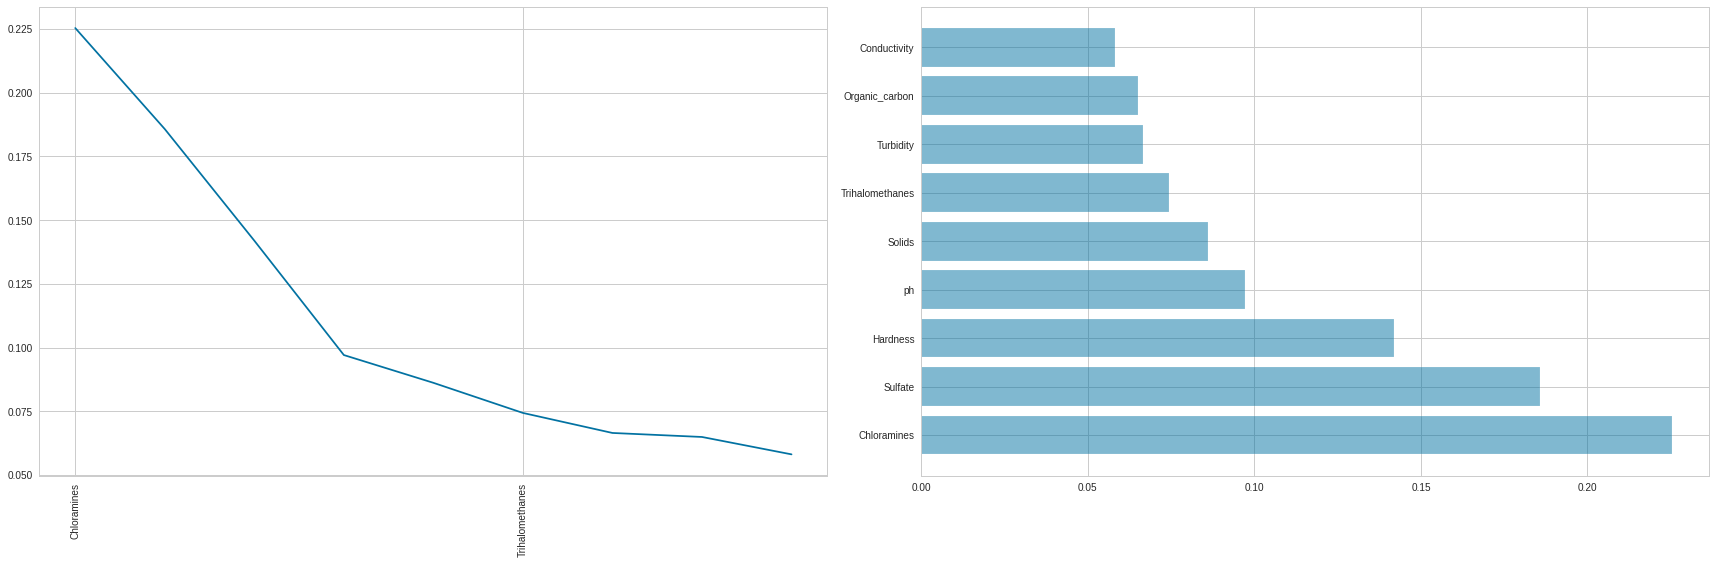

In [ ]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)

    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)